In [5]:
import json
import glob
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import config

from core.pandas_util import read_pandas_frame_from_results_folder, get_keychain_value

from core.train_engine import BackboneTrainResultFolder

pd.options.display.max_rows = 99999

In [2]:
FRAME = read_pandas_frame_from_results_folder(config.paths.ablation_res_dir)

In [3]:
wanted_col = [
 #'batch_size', # not needed as always 100
 'top_loss_w',
 #'filter_config',# not needed as always (3, 32,  64, 128)
 #'bb_dataset',# not needed as always cifar100
 'n_branches',
 'out_features_branch',
 'n_train_samples',
 'scorer_truncation_radius',
 'avg', 
 'std']

FRAME = FRAME[wanted_col]

### Top 20 configurations

In [4]:
x = FRAME.groupby([n for n in FRAME if n not in ['avg','std']])
x = x.mean()
x.sort_values(by='avg', ascending=False)[:20]

avg  \
top_loss_w n_branches out_features_branch n_train_samples scorer_truncation_radius             
20.0       16         10                  5000            1.50                      0.791779   
           8          20                  5000            1.75                      0.791074   
10.0       32         10                  5000            1.50                      0.790626   
20.0       32         10                  5000            1.50                      0.790007   
40.0       32         10                  5000            1.50                      0.788100   
20.0       8          20                  5000            1.50                      0.787174   
10.0       32         10                  5000            1.75                      0.786929   
20.0       16         10                  5000            1.75                      0.786842   
10.0       16         10                  5000            1.50                      0.785612   
40.0       16         10                  5000            1.50                      0.785480   
20.0       8          10                  5000            1.50                      0.785260   
           32         10                  5000            1.75                      0.784733   
10.0       8          10                  5000            1.50                      0.782788   
           32         10                  5000            2.00                      0.781783   
40.0       32         10                  5000            1.75                      0.781566   
20.0       8          10                  5000            1.75                      0.781563   
                      20                  5000            2.00                      0.781162   
10.0       16         10                  5000            1.75                      0.780863   
20.0       16         10                  5000            2.00                      0.780638   
10.0       32         10                  500             1.75                      0.780304   

                                                                                             std  
top_loss_w n_branches out_features_branch n_train_samples scorer_truncation_radius                
20.0       16         10                  5000            1.50                      1.110223e-17  
           8          20                  5000            1.75                      1.110223e-17  
10.0       32         10                  5000            1.50                      0.000000e+00  
20.0       32         10                  5000            1.50                      3.330669e-17  
40.0       32         10                  5000            1.50                      0.000000e+00  
20.0       8          20                  5000            1.50                      1.110223e-17  
10.0       32         10                  5000            1.75                      0.000000e+00  
20.0       16         10                  5000            1.75                      1.110223e-17  
10.0       16         10                  5000            1.50                      1.110223e-17  
40.0       16         10                  5000            1.50                      3.330669e-17  
20.0       8          10                  5000            1.50                      1.110223e-17  
           32         10                  5000            1.75                      0.000000e+00  
10.0       8          10                  5000            1.50                      2.220446e-17  
           32         10                  5000            2.00                      1.110223e-17  
40.0       32         10                  5000            1.75                      2.220446e-17  
20.0       8          10                  5000            1.75                      1.110223e-17  
                      20                  5000            2.00                      4.440892e-17  
10.0       16         10                  5000            1.75                      3.330669e-1

### Top 10 small sample size configurations 

In [5]:
x = FRAME.groupby([n for n in FRAME if n not in ['avg','std']])
x = x.mean()
x = x.query('n_train_samples == 5000 and out_features_branch==20 and top_loss_w==20.0 and scorer_truncation_radius==2.0')
small_sample_size_configurations = x.sort_values(by='avg', ascending=False)
small_sample_size_configurations[:20]

avg  \
top_loss_w n_branches out_features_branch n_train_samples scorer_truncation_radius             
20.0       8          20                  5000            2.0                       0.781162   
           16         20                  5000            2.0                       0.751360   
           32         20                  5000            2.0                       0.739959   

                                                                                             std  
top_loss_w n_branches out_features_branch n_train_samples scorer_truncation_radius                
20.0       8          20                  5000            2.0                       4.440892e-17  
           16         20                  5000            2.0                       2.220446e-17  
           32         20                  5000            2.0                       2.220446e-17

### Impact of truncation radius wrt sample size

In [6]:
x = FRAME.groupby([n for n in FRAME if n not in ['avg','std']]).mean()
x
#x = x.query('top_loss_w == 20.0 and n_branches == 32 and out_features_branch == 10')
#x.sort_values(by='n_train_samples')

avg  \
top_loss_w n_branches out_features_branch n_train_samples scorer_truncation_radius             
0.0        1          160                 10              0.50                      0.500000   
                                                          1.00                      0.500000   
                                                          1.50                      0.500000   
                                                          1.75                      0.500000   
                                                          2.00                      0.500000   
                                                          2.25                      0.500000   
                                                          2.50                      0.500000   
                                                          3.00                      0.500000   
                                                          4.00                      0.500000   
                                                          5.00                      0.500000   
                                          50              0.50                      0.500000   
                                                          1.00                      0.500000   
                                                          1.50                      0.500000   
                                                          1.75                      0.500000   
                                                          2.00                      0.500000   
                                                          2.25                      0.500000   
                                                          2.50                      0.500000   
                                                          3.00                      0.500000   
                                                          4.00                      0.500000   
                                                          5.00                      0.500000   
                                          80              0.50                      0.500000   
                                                          1.00                      0.500000   
                                                          1.50                      0.500000   
                                                          1.75                      0.500000   
                                                          2.00                      0.500000   
                                                          2.25                      0.500000   
                                                          2.50                      0.500000   
                                                          3.00                      0.500000   
                                                          4.00                      0.500000   
                                                          5.00                      0.500000   
                                          100             0.50                      0.500000   
                                                          1.00                      0.500000   
                                                          1.50                      0.500000   
                                                          1.75                      0.500000   
                                                          2.00                      0.500000   
                                                          2.25                      0.500000   
                                                          2.50                      0.500000   
                                                          3.00                      0.500000   
                                                          4.00                      0.500000   
                                                          5.00                      0.500000   
                                          120            

### Effect of lambda

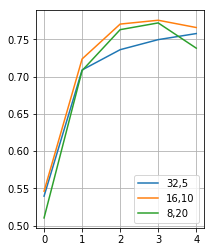

In [7]:
x = FRAME.groupby([n for n in FRAME if n not in ['avg','std']])
x = x.mean()

plt.figure(figsize=(3,4))
for a,b in [(32,5),(16,10),(8,20)]:
    res = x.query("scorer_truncation_radius==2.0 and n_branches=={} and out_features_branch=={} and n_train_samples==500".format(
        a,b))
    plt.plot(np.array(res)[:,0],label='{},{}'.format(a,b))
plt.grid()
plt.legend()

### Sample size

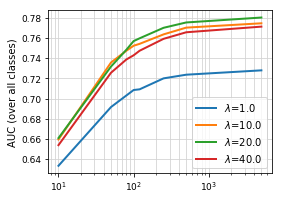

In [18]:
fontsize = 9
color = 'black'
fsize = (4,3)
#plt.style.use('ggplot')

x = FRAME.groupby([n for n in FRAME if n not in ['avg','std']])
x = x.mean()

plt.figure(figsize=fsize)
for tr in [1.0, 10.0, 20.0, 40.0]:
    res = x.query("scorer_truncation_radius==2.0 and n_branches==16 and out_features_branch==10 and top_loss_w=={}".format(tr))    
    plt.semilogx([10,50,80,100,120,250,500,5000], np.array(res)[:,0], label='$\lambda$={}'.format(tr),lw=2)

leg = plt.legend(fontsize=fontsize+1)
for text in leg.get_texts():
    plt.setp(text, color = color)

plt.ylabel('AUC (over all classes)',fontsize=fontsize+1)#labelpad=-44,color='dimgray',fontweight='normal')
plt.gca().tick_params(axis='both', labelsize=fontsize, color=color)
plt.gca().grid(True, which='both',color='lightgray')
plt.savefig('/tmp/AUC_vs_samplesize.pdf',bbox_inches='tight',pad_inches=0.0)

### Densification experiment
Can we observe densification if we set the truncation radius 
much smaller than $\eta$ and increase the number of training 
samples?

In [8]:
x = FRAME.groupby([n for n in FRAME if n not in ['avg','std']])
x = x.mean()
x = x.query("scorer_truncation_radius==1.0 and top_loss_w==20.0")
x = x.query("n_branches==32")
x

avg  \
top_loss_w n_branches out_features_branch n_train_samples scorer_truncation_radius             
20.0       32         5                   10              1.0                       0.565283   
                                          50              1.0                       0.651990   
                                          80              1.0                       0.680794   
                                          100             1.0                       0.688609   
                                          120             1.0                       0.696059   
                                          250             1.0                       0.724292   
                                          500             1.0                       0.741368   
                                          5000            1.0                       0.762112   
                      10                  10              1.0                       0.508657   
                                          50              1.0                       0.534153   
                                          80              1.0                       0.551648   
                                          100             1.0                       0.560877   
                                          120             1.0                       0.568544   
                                          250             1.0                       0.613032   
                                          500             1.0                       0.658534   
                                          5000            1.0                       0.771820   
                      20                  10              1.0                       0.500217   
                                          50              1.0                       0.501568   
                                          80              1.0                       0.502359   
                                          100             1.0                       0.503056   
                                          120             1.0                       0.503300   
                                          250             1.0                       0.506003   
                                          500             1.0                       0.512268   
                                          5000            1.0                       0.568479   

                                                                                             std  
top_loss_w n_branches out_features_branch n_train_samples scorer_truncation_radius                
20.0       32         5                   10              1.0                       1.592307e-02  
                                          50              1.0                       1.188415e-02  
                                          80              1.0                       1.123529e-02  
                                          100             1.0                       9.723421e-03  
                                          120             1.0                       9.401336e-03  
                                          250             1.0                       5.851720e-03  
                                          500             1.0                       5.076871e-03  
                                          5000            1.0                       1.110223e-17  
                      10                  10              1.0                       2.994248e-03  
                                          50              1.0                       6.127106e-03  
                                          80              1.0                       6.411242e-03  
                                          100             1.0                       5.691132e-03  
                                          120             1.0                       7.439514e-03  
                                          250             1.0                       7.128316e-03  
        